# Operaciones básicas con Imágenes en OpenCV





## Introducción

En este documento aprenderemos a realizar **transformaciones geométricas básicas** sobre imágenes utilizando **OpenCV** en Python.  
Estas operaciones son esenciales en el preprocesamiento de imágenes antes de aplicar técnicas más avanzadas.

Transformaciones que cubriremos:

- **Redimensionamiento (resize)**
- **Recorte (crop)**
- **Rotación**
- **Traslación (desplazamiento)**

---

## Configuración inicial

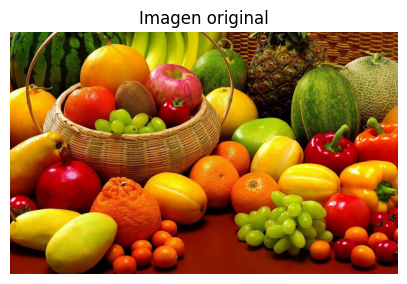

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

# Función auxiliar para mostrar imágenes en color o grises
def mostrar_img(img, titulo="Imagen", cmap=None):
    plt.figure(figsize=(5,5))
    if len(img.shape) == 2:  # Escala de grises
        plt.imshow(img, cmap='gray')
    else:  # Color (BGR → RGB)
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(titulo)
    plt.axis('off')
    plt.show()

# Ruta a la carpeta de imágenes (ajustar según tu equipo)
carpeta = Path("imagenes")

# Cargar imagen de ejemplo
img = cv2.imread(str(carpeta / "frutas.jpg"))
mostrar_img(img, "Imagen original")


---

## Redimensionamiento (Resize)

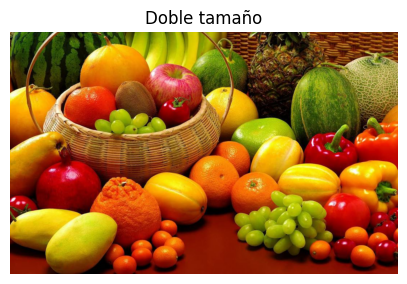

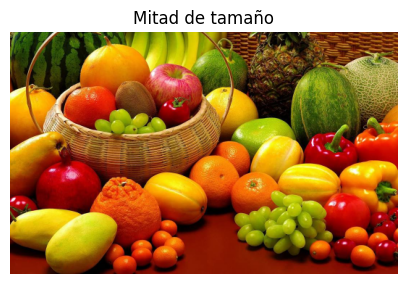

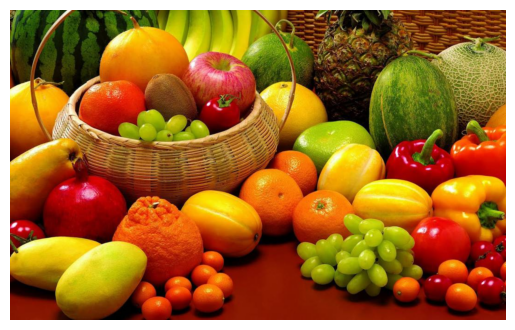

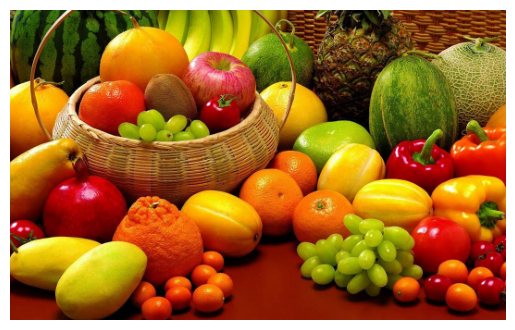

Dimensiones de las imágenes:
Original: (670, 1072, 3)
Doble tamaño: (1340, 2144, 3)
Mitad de tamaño: (335, 536, 3)


In [12]:
# Imagen al doble de tamaño
img_doble = cv2.resize(img, None, fx=2, fy=2, interpolation=cv2.INTER_LINEAR)
mostrar_img(img_doble, "Doble tamaño")

# Imagen a la mitad
img_mitad = cv2.resize(img, None, fx=0.5, fy=0.5, interpolation=cv2.INTER_AREA)
mostrar_img(img_mitad, "Mitad de tamaño")


plt.imshow(cv2.cvtColor(img_doble, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

plt.imshow(cv2.cvtColor(img_mitad, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

print("Dimensiones de las imágenes:")
print("Original:", img.shape)
print("Doble tamaño:", img_doble.shape)
print("Mitad de tamaño:", img_mitad.shape)


---

## Recorte (Crop)

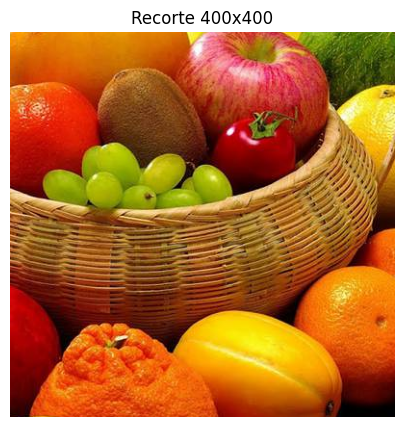

In [13]:
# Recorte de una región específica (y1:y2, x1:x2)
crop = img[100:500, 200:600]
mostrar_img(crop, "Recorte 400x400")

---

## Rotación

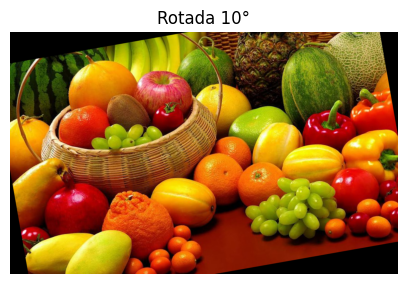

In [14]:
# Obtener dimensiones
(h, w) = img.shape[:2]
centro = (w // 2, h // 2)

# Matriz de rotación (10 grados)
M_rot = cv2.getRotationMatrix2D(centro, 10, 1.0)
rotada = cv2.warpAffine(img, M_rot, (w, h))
mostrar_img(rotada, "Rotada 10°")

---

## Traslación (Desplazamiento)

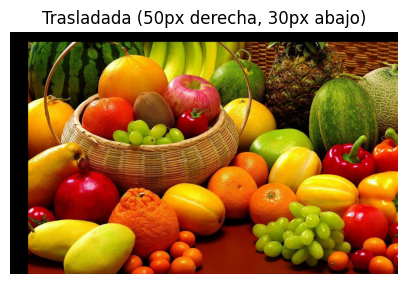

In [15]:
# Matriz de traslación: mover 50 px a la derecha y 30 px abajo
M_tras = np.float32([[1, 0, 50], [0, 1, 30]])
trasladada = cv2.warpAffine(img, M_tras, (w, h))
mostrar_img(trasladada, "Trasladada (50px derecha, 30px abajo)")

---

## Conclusión

En este ejemplo hemos cubierto transformaciones geométricas básicas que son fundamentales para el preprocesamiento de imágenes:

- **Resize** para ajustar el tamaño.
- **Crop** para enfocar regiones de interés.
- **Rotación y traslación** para reposicionar la imagen.

Estas operaciones forman la base para tareas más complejas como la alineación y el registro de imágenes.